In [1]:
from tensorflow.keras.datasets import mnist
#from tensorflow.keras.utils import np_utils #아래 표현으로 변경되었습니다.
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [4]:

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.15736, saving model to ./model/01-0.1574.hdf5

Epoch 00002: val_loss improved from 0.15736 to 0.10265, saving model to ./model/02-0.1026.hdf5

Epoch 00003: val_loss improved from 0.10265 to 0.08382, saving model to ./model/03-0.0838.hdf5

Epoch 00004: val_loss improved from 0.08382 to 0.07414, saving model to ./model/04-0.0741.hdf5

Epoch 00005: val_loss improved from 0.07414 to 0.06524, saving model to ./model/05-0.0652.hdf5

Epoch 00006: val_loss did not improve from 0.06524

Epoch 00007: val_loss did not improve from 0.06524

Epoch 00008: val_loss improved from 0.06524 to 0.06136, saving model to ./model/08-0.0614.hdf5

Epoch 00009: val_loss did not improve from 0.06136

Epoch 00010: val_loss did not improve from 0.06136

Epoch 00011: val_loss improved from 0.06136 to 0.06106, saving model to ./model/11-0.0611.hdf5

Epoch 00012: val_loss did not improve from 0.06106

Epoch 00013: val_loss did not improve from 0.06106

Epoch 00014: val_lo

In [8]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0657 - accuracy: 0.9835

 Test Accuracy: 0.9835


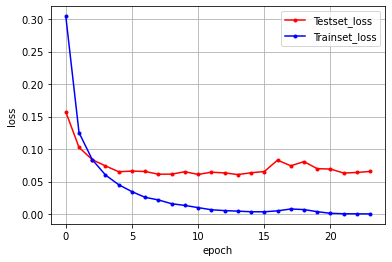

In [9]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()